<a href="https://colab.research.google.com/github/tmmridho/assignment2_hacktiv8/blob/main/PYIM_Assgn_2_8_Teuku_Muhammad_Mifdhal_Ridho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Download zip file

In [2]:
!wget https://arjunaskykok.s3.ap-southeast-1.amazonaws.com/support/kagglecatsanddogs_3367a.zip

--2021-06-24 10:50:37--  https://arjunaskykok.s3.ap-southeast-1.amazonaws.com/support/kagglecatsanddogs_3367a.zip
Resolving arjunaskykok.s3.ap-southeast-1.amazonaws.com (arjunaskykok.s3.ap-southeast-1.amazonaws.com)... 52.219.125.55
Connecting to arjunaskykok.s3.ap-southeast-1.amazonaws.com (arjunaskykok.s3.ap-southeast-1.amazonaws.com)|52.219.125.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/zip]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  15.2MB/s    in 54s     

2021-06-24 10:51:32 (14.5 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



# Unzip file

In [3]:
!unzip kagglecatsanddogs_3367a.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

# Data cleansing

In [4]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


# Split train and validation data

In [5]:
image_size = (180, 180)

In [6]:
img_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/PetImages',
    batch_size=32,
    image_size=(180, 180),
    seed=1337,
    validation_split=0.2,
    subset="training"
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.


In [7]:
img_val = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/PetImages',
    batch_size=32,
    image_size=(180, 180),
    seed=1337,
    validation_split=0.2,
    subset="validation"
)

Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [8]:
dir(img_train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_de

# Check class name

In [9]:
class_names = img_train.class_names
print(class_names)

['Cat', 'Dog']


# Visualize data

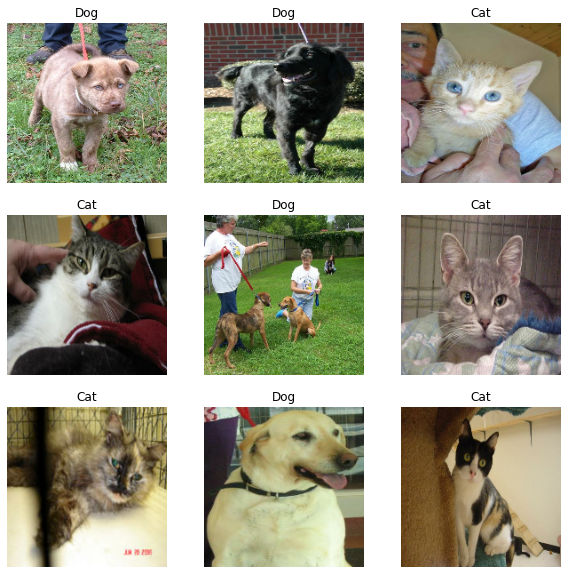

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in img_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Data augmentation

In [11]:
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

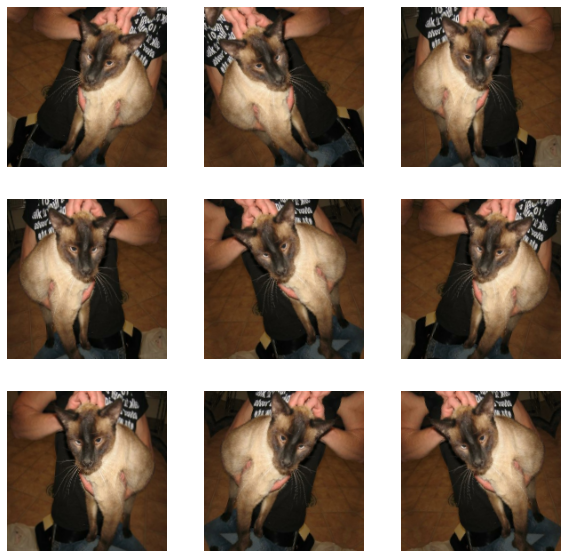

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in img_train.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Configure dataset

In [13]:
img_train = img_train.prefetch(buffer_size=32)
img_val = img_val.prefetch(buffer_size=32)

# Build model

In [14]:
inputs = tf.keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)

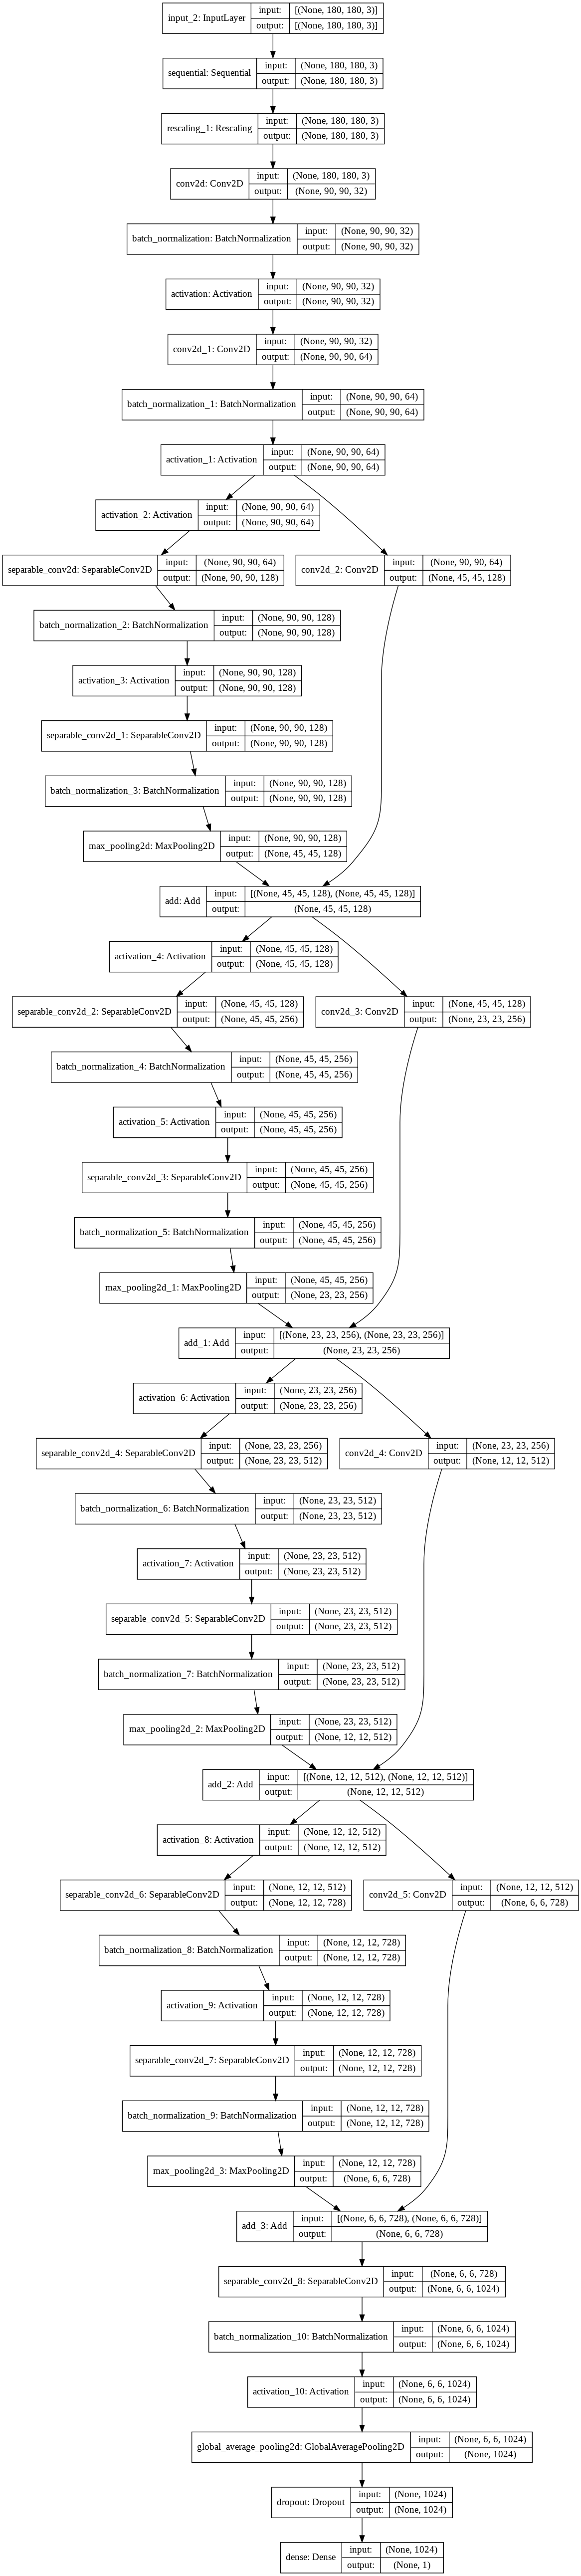

In [15]:
def make_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)


model = make_model(input_shape=(180,180) + (3,), num_classes=2)
tf.keras.utils.plot_model(model, show_shapes=True)

# Training the model

In [16]:
epochs = 20

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    img_train, epochs=epochs, callbacks=callbacks, validation_data=img_val,
)

Epoch 1/20
586/586 [==============================] - 244s 359ms/step - loss: 0.6229 - accuracy: 0.6651 - val_loss: 0.7182 - val_accuracy: 0.6664


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
586/586 [==============================] - 210s 357ms/step - loss: 0.4621 - accuracy: 0.7812 - val_loss: 0.5178 - val_accuracy: 0.7890
Epoch 3/20
586/586 [==============================] - 210s 359ms/step - loss: 0.3838 - accuracy: 0.8313 - val_loss: 0.4827 - val_accuracy: 0.8167
Epoch 4/20
586/586 [==============================] - 210s 359ms/step - loss: 0.3174 - accuracy: 0.8632 - val_loss: 0.2388 - val_accuracy: 0.9013
Epoch 5/20
586/586 [==============================] - 211s 359ms/step - loss: 0.2595 - accuracy: 0.8903 - val_loss: 0.3660 - val_accuracy: 0.8266
Epoch 6/20
586/586 [==============================] - 210s 358ms/step - loss: 0.2223 - accuracy: 0.9075 - val_loss: 0.2917 - val_accuracy: 0.8740
Epoch 7/20
586/586 [==============================] - 210s 357ms/step - loss: 0.2049 - accuracy: 0.9164 - val_loss: 0.2670 - val_accuracy: 0.8891
Epoch 8/20
586/586 [==============================] - 210s 357ms/step - loss: 0.1849 - accuracy: 0.9237 - val_loss: 0.1849 -

# Testing with new data

In [19]:
img = tf.keras.preprocessing.image.load_img(
    "PetImages/Cat/6869.jpg", target_size=image_size
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 74.04 percent cat and 25.96 percent dog.
